In [99]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import rc

In [100]:
def print_network_graph(ssoln_dict:dict, eps:float=0.0, norm_factor:float=1.0):
    G = nx.DiGraph()
    
    
    # ssoln_dict = iter_ssoln_dict[1]
    nodes = {
    'Location 1': {
        'Capacity': ssoln_dict['Cap_P[loc1,com1_process,0]']/norm_factor if 'Cap_P[loc1,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc1,com1_store_com1_in_stored,0]']/norm_factor if 'Cap_S[loc1,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 2': {
        'Capacity': ssoln_dict['Cap_P[loc2,com1_process,0]']/norm_factor if 'Cap_P[loc2,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc2,com1_store_com1_in_stored,0]']/norm_factor if 'Cap_S[loc2,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 3': {
        'Capacity': ssoln_dict['Cap_P[loc3,com1_process,0]']/norm_factor if 'Cap_P[loc3,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc3,com1_store_com1_in_stored,0]']/norm_factor if 'Cap_S[loc3,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 4': {
        'Capacity': ssoln_dict['Cap_P[loc4,com1_process,0]']/norm_factor if 'Cap_P[loc4,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc4,com1_store_com1_in_stored,0]']/norm_factor if 'Cap_S[loc4,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 5': {
        'Capacity': ssoln_dict['Cap_P[loc5,com1_process,0]']/norm_factor if 'Cap_P[loc5,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc5,com1_store_com1_in_stored,0]']/norm_factor if 'Cap_S[loc5,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 6': {
        'Capacity': ssoln_dict['Cap_P[loc6,com1_process,0]']/norm_factor if 'Cap_P[loc6,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc6,com1_store_com1_in_stored,0]']/norm_factor if 'Cap_S[loc6,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 7': {
        'Capacity': ssoln_dict['Cap_P[loc7,com1_process,0]']/norm_factor if 'Cap_P[loc7,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc7,com1_store_com1_in_stored,0]']/norm_factor if 'Cap_S[loc7,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    }
    
    # Add nodes to the graph
    G.add_nodes_from(nodes.keys())
    
    # Define edges (connections between nodes)
    edges = [
        ('Location 1', 'Location 2', {'weight': ssoln_dict['Cap_F[loc1,loc2,truck12,0]']/norm_factor if 'Cap_F[loc1,loc2,truck12,0]' in ssoln_dict.keys() else 0}),
        ('Location 1', 'Location 3', {'weight': ssoln_dict['Cap_F[loc1,loc3,truck13,0]']/norm_factor if 'Cap_F[loc1,loc3,truck13,0]' in ssoln_dict.keys() else 0}),
        ('Location 1', 'Location 5', {'weight': ssoln_dict['Cap_F[loc1,loc5,plane15,0]']/norm_factor if 'Cap_F[loc1,loc5,plane15,0]' in ssoln_dict.keys() else 0}),
        ('Location 2', 'Location 4', {'weight': ssoln_dict['Cap_F[loc2,loc4,truck24,0]']/norm_factor if 'Cap_F[loc2,loc4,truck24,0]' in ssoln_dict.keys() else 0}),
        ('Location 2', 'Location 5', {'weight': ssoln_dict['Cap_F[loc2,loc5,truck25,0]']/norm_factor if 'Cap_F[loc2,loc5,truck25,0]' in ssoln_dict.keys() else 0}),
        ('Location 3', 'Location 4', {'weight': ssoln_dict['Cap_F[loc3,loc4,truck34,0]']/norm_factor if 'Cap_F[loc3,loc4,truck34,0]' in ssoln_dict.keys() else 0}),
        ('Location 4', 'Location 5', {'weight': ssoln_dict['Cap_F[loc4,loc5,truck45,0]']/norm_factor if 'Cap_F[loc4,loc5,truck45,0]' in ssoln_dict.keys() else 0}),
        ('Location 4', 'Location 7', {'weight': ssoln_dict['Cap_F[loc4,loc7,truck47,0]']/norm_factor if 'Cap_F[loc4,loc7,truck47,0]' in ssoln_dict.keys() else 0}),
        ('Location 6', 'Location 4', {'weight': ssoln_dict['Cap_F[loc6,loc4,truck64,0]']/norm_factor if 'Cap_F[loc6,loc4,truck64,0]' in ssoln_dict.keys() else 0}),
        # ('Location 6', 'Location 5', {'weight': ssoln_dict['Cap_F[loc6,loc5,plane65,0]'] if 'Cap_F[loc6,loc5,plane65,0]' in ssoln_dict.keys() else 0}),
        ('Location 7', 'Location 5', {'weight': ssoln_dict['Cap_F[loc7,loc5,truck75,0]']/norm_factor if 'Cap_F[loc7,loc5,truck75,0]' in ssoln_dict.keys() else 0}),
    ]
    
    # Add edges to the graph
    G.add_edges_from(edges)
    
    # Define fixed positions for nodes
    fixed_positions = {
        'Location 1': (-2, 2),
        'Location 2': (0, 2),
        'Location 3': (-2, 0),
        'Location 4': (0, 0),
        'Location 5': (2, 0),
        'Location 6': (-2, -2),
        'Location 7': (1, -2)
    }
    
    # Create custom labels combining multiple pieces of information
    node_labels = {node: f"Capacity: {data['Capacity']:.2f}\nInventory: {data['Inventory']:.2f}" for node, data in nodes.items()}
    
    # Draw nodes and edges with fixed positions
    nx.draw_networkx_nodes(G, fixed_positions, node_color='skyblue', node_size=700)
    nx.draw_networkx_edges(G, fixed_positions, edgelist=edges, arrowstyle='simple', arrowsize=15)
    nx.draw_networkx_labels(G, fixed_positions, labels=node_labels, font_size=8, font_color='red', bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, boxstyle="round,pad=0.3"))
    
    # Draw edge labels (optional)
    edge_labels = {(u, v): round(d['weight'],3) for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, fixed_positions, edge_labels=edge_labels, label_pos=0.4, font_size=8)
    
    # Expand plot limits to prevent cutoff
    x_values, y_values = zip(*fixed_positions.values())
    plt.xlim(min(x_values) - 1, max(x_values) + 1)
    plt.ylim(min(y_values) - 1, max(y_values) + 1)
    
    # Show the plot
    plt.title(f"Supply Chain Network considering fill rate of {eps}")
    # plt.figure(figsize=(16,12))
    plt.show()  

In [101]:
eps = 1

In [102]:
# with open(f'HPRC_results/FD_64_{int(eps * 10):02d}_final_results_EF.pkl', 'rb') as file:
#     load = pickle.load(file)
# 
# load

In [103]:
with open(f'HPRC_results/final/ssoln_64_{int(eps * 10):02d}_UI_EF.pkl', 'rb') as file:
    load_ssoln = pickle.load(file)

In [104]:
load_ssoln['Cap_P[loc6,procure com1,0]']

40.0

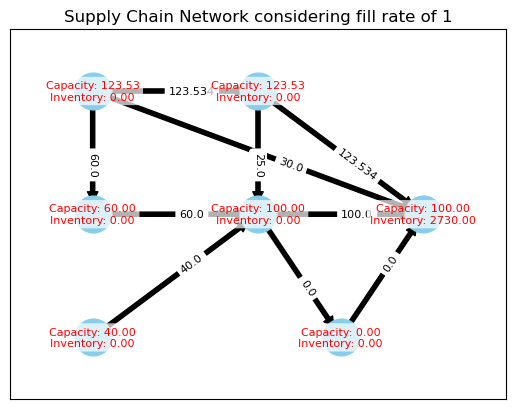

In [105]:
print_network_graph(ssoln_dict=load_ssoln, eps=eps, norm_factor=1)

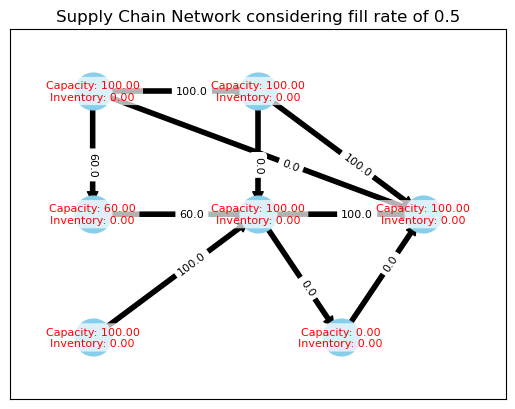

Procurement capacity at Location 1: 100.00000000000003
Procurement capacity at Location 6: 100.0


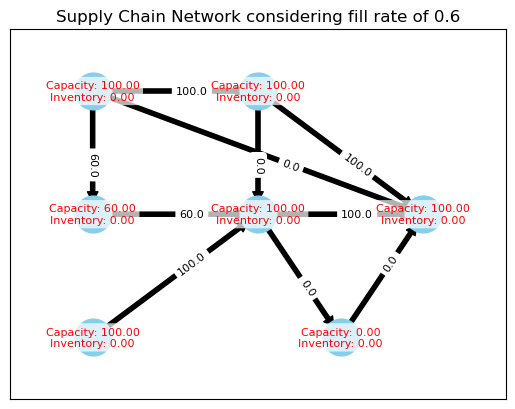

Procurement capacity at Location 1: 100.00000000000055
Procurement capacity at Location 6: 100.0


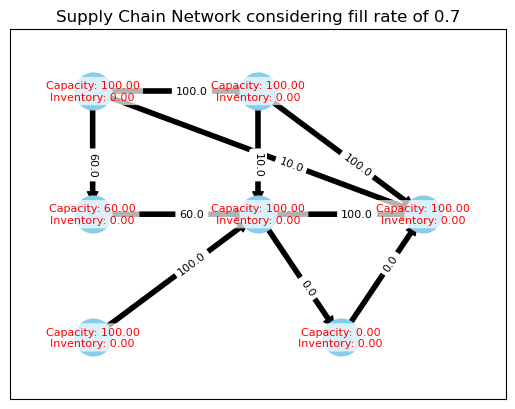

Procurement capacity at Location 1: 100.0
Procurement capacity at Location 6: 99.99999999999997


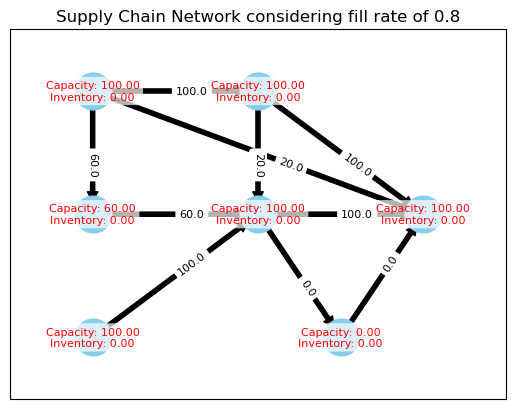

Procurement capacity at Location 1: 100.0
Procurement capacity at Location 6: 100.0


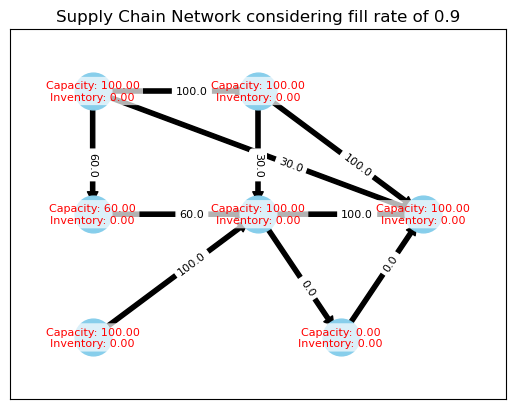

Procurement capacity at Location 1: 100.0
Procurement capacity at Location 6: 100.0


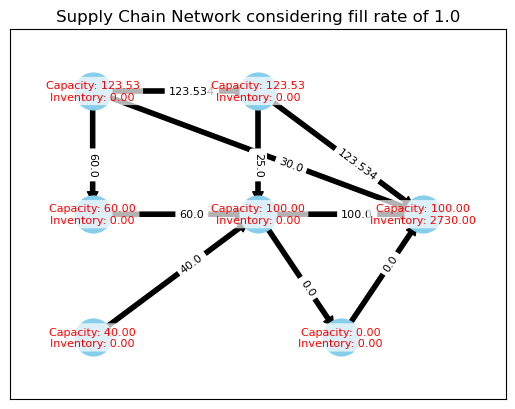

Procurement capacity at Location 1: 123.53448275862075
Procurement capacity at Location 6: 40.0


In [109]:
for eps in [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    with open(f'HPRC_results/final/ssoln_64_{int(eps * 10):02d}_UI_EF.pkl', 'rb') as file:
        load_ssoln = pickle.load(file)
    print_network_graph(ssoln_dict=load_ssoln, eps=eps, norm_factor=1)
    print(f'Procurement capacity at Location 1: {load_ssoln["Cap_P[loc1,procure com1,0]"]}')
    print(f'Procurement capacity at Location 6: {load_ssoln["Cap_P[loc6,procure com1,0]"]}')

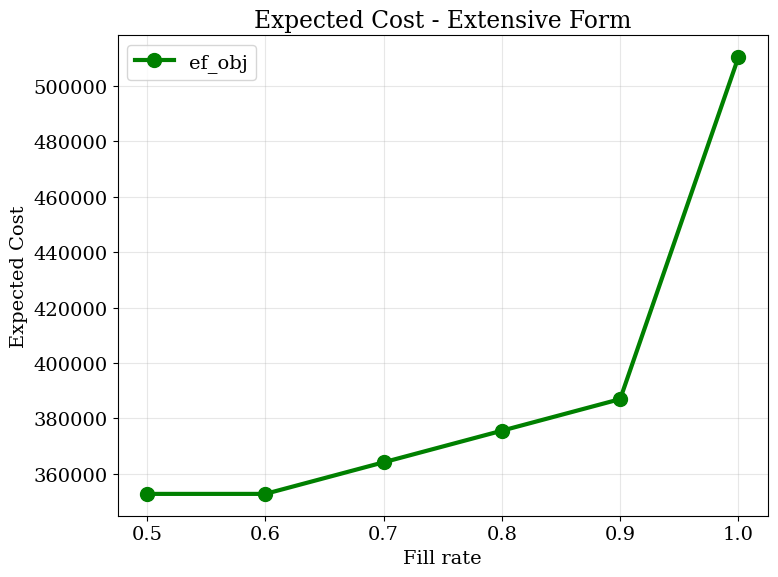

In [108]:
rc('font', **{'family': 'serif', 'size': 14})

fig, ax = plt.subplots(figsize = (8, 6))
# ax1 = ax.twinx()

x, y = list(), list()
for eps in [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    x.append(eps)
    with open(f'HPRC_results/final/64_{int(eps * 10):02d}_final_results_EF.pkl', 'rb') as file:
        load_results = pickle.load(file)
    y.append(load_results[64]['Expected Cost UI'])
# Example data
# x = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# y = [414840.2028, 414840.2028, 425383.94, 435927.6931, 446471.4384, 457015.1836]
y2 = [25594, 25594, 29495, 3396, 37297, 41198]
# Plotting
ax.plot(x, y, marker='o', label='ef_obj', color = 'green', linewidth=3, markersize=10)  # 'o' adds circular markers at data points
# ax1.plot(x, y2, marker='x', label='approx_obj', color ='blue')
plt.title('Expected Cost - Extensive Form')
ax.set_ylabel('Expected Cost')
# ax1.set_ylabel('Expected Cost (Approx.)')
ax.set_xlabel('Fill rate')
plt.grid(alpha = 0.3)
# ax1.legend(loc='lower right')
ax.legend(loc='upper left')
plt.tight_layout()
plt.savefig(fname = 'pareto_ef', dpi = 300)
plt.show()
plt.rcdefaults()

In [95]:
with open(f'HPRC_results/final/64_10_final_results_EF.pkl', 'rb') as file:
    final_results_dict = pickle.load(file)

In [97]:
final_results_dict[64]['Expected Cost UI']

510455.6072860001

In [78]:
with open(f'HPRC_results/output_64_09_UI_EF.pkl', 'rb') as file:
    load_output_dict = pickle.load(file)

In [79]:
list(load_output_dict.keys())

['truck25_2 cap2_1 res6_1 truck47_1',
 'truck25_2 cap2_1 res6_1 truck47_nd',
 'truck25_2 cap2_1 res6_2 truck47_1',
 'truck25_2 cap2_1 res6_2 truck47_nd',
 'truck25_2 cap2_1 res6_3 truck47_1',
 'truck25_2 cap2_1 res6_3 truck47_nd',
 'truck25_2 cap2_1 res6_nd truck47_1',
 'truck25_2 cap2_1 res6_nd truck47_nd',
 'truck25_2 cap2_2 res6_1 truck47_1',
 'truck25_2 cap2_2 res6_1 truck47_nd',
 'truck25_2 cap2_2 res6_2 truck47_1',
 'truck25_2 cap2_2 res6_2 truck47_nd',
 'truck25_2 cap2_2 res6_3 truck47_1',
 'truck25_2 cap2_2 res6_3 truck47_nd',
 'truck25_2 cap2_2 res6_nd truck47_1',
 'truck25_2 cap2_2 res6_nd truck47_nd',
 'truck25_2 cap2_3 res6_1 truck47_1',
 'truck25_2 cap2_3 res6_1 truck47_nd',
 'truck25_2 cap2_3 res6_2 truck47_1',
 'truck25_2 cap2_3 res6_2 truck47_nd',
 'truck25_2 cap2_3 res6_3 truck47_1',
 'truck25_2 cap2_3 res6_3 truck47_nd',
 'truck25_2 cap2_3 res6_nd truck47_1',
 'truck25_2 cap2_3 res6_nd truck47_nd',
 'truck25_2 cap2_nd res6_1 truck47_1',
 'truck25_2 cap2_nd res6_1 truc

In [83]:
list(load_output_dict.keys())[-1]

'truck25_nd cap2_nd res6_nd truck47_nd'

In [84]:
print(*[(key, value) for key, value in load_output_dict[list(load_output_dict.keys())[-1]]['Exp_F'].items() if (value!=0 and key[0]=='loc4' and key[1]=='loc7' and key[2]=='truck47')], sep='\n')

(('loc4', 'loc7', 'truck47', 0, 0, 0), 40.0)
(('loc4', 'loc7', 'truck47', 0, 0, 1), 40.0)
(('loc4', 'loc7', 'truck47', 0, 0, 2), 40.0)
(('loc4', 'loc7', 'truck47', 0, 0, 3), 40.0)
(('loc4', 'loc7', 'truck47', 0, 0, 4), 40.0)
(('loc4', 'loc7', 'truck47', 0, 0, 5), 40.0)
(('loc4', 'loc7', 'truck47', 0, 0, 6), 40.0)
(('loc4', 'loc7', 'truck47', 0, 1, 0), 40.0)
(('loc4', 'loc7', 'truck47', 0, 1, 1), 40.0)
(('loc4', 'loc7', 'truck47', 0, 1, 2), 40.0)
(('loc4', 'loc7', 'truck47', 0, 1, 3), 40.0)
(('loc4', 'loc7', 'truck47', 0, 1, 4), 40.0)
(('loc4', 'loc7', 'truck47', 0, 1, 5), 40.0)
(('loc4', 'loc7', 'truck47', 0, 1, 6), 40.0)
(('loc4', 'loc7', 'truck47', 0, 2, 0), 40.0)
(('loc4', 'loc7', 'truck47', 0, 2, 1), 40.0)
(('loc4', 'loc7', 'truck47', 0, 2, 2), 40.0)
(('loc4', 'loc7', 'truck47', 0, 2, 3), 40.0)
(('loc4', 'loc7', 'truck47', 0, 2, 4), 40.0)
(('loc4', 'loc7', 'truck47', 0, 2, 5), 40.0)
(('loc4', 'loc7', 'truck47', 0, 2, 6), 40.0)
(('loc4', 'loc7', 'truck47', 0, 3, 0), 40.0)
(('loc4', 

In [85]:
print(*[(key, value) for key, value in load_output_dict[list(load_output_dict.keys())[-1]]['Exp_F'].items() if (value!=0 and key[0]=='loc2' and key[1]=='loc5' and key[2]=='truck25')], sep='\n')

(('loc2', 'loc5', 'truck25', 0, 0, 0), 60.0)
(('loc2', 'loc5', 'truck25', 0, 0, 1), 60.0)
(('loc2', 'loc5', 'truck25', 0, 0, 2), 60.0)
(('loc2', 'loc5', 'truck25', 0, 0, 3), 60.0)
(('loc2', 'loc5', 'truck25', 0, 0, 4), 60.0)
(('loc2', 'loc5', 'truck25', 0, 0, 5), 60.0)
(('loc2', 'loc5', 'truck25', 0, 0, 6), 60.0)
(('loc2', 'loc5', 'truck25', 0, 1, 0), 60.0)
(('loc2', 'loc5', 'truck25', 0, 1, 1), 60.0)
(('loc2', 'loc5', 'truck25', 0, 1, 2), 60.0)
(('loc2', 'loc5', 'truck25', 0, 1, 3), 60.0)
(('loc2', 'loc5', 'truck25', 0, 1, 4), 60.0)
(('loc2', 'loc5', 'truck25', 0, 1, 5), 60.0)
(('loc2', 'loc5', 'truck25', 0, 1, 6), 60.0)
(('loc2', 'loc5', 'truck25', 0, 2, 0), 60.0)
(('loc2', 'loc5', 'truck25', 0, 2, 1), 60.0)
(('loc2', 'loc5', 'truck25', 0, 2, 2), 60.0)
(('loc2', 'loc5', 'truck25', 0, 2, 3), 60.0)
(('loc2', 'loc5', 'truck25', 0, 2, 4), 60.0)
(('loc2', 'loc5', 'truck25', 0, 2, 5), 60.0)
(('loc2', 'loc5', 'truck25', 0, 2, 6), 60.0)
(('loc2', 'loc5', 'truck25', 0, 3, 0), 60.0)
(('loc2', 

In [86]:
print(*[(key, value) for key, value in load_output_dict[list(load_output_dict.keys())[-1]]['P'].items() if (value!=0 and key[0]=='loc2' and key[1]=='com1_process')], sep='\n')

(('loc2', 'com1_process', 0, 0, 0), 60.0)
(('loc2', 'com1_process', 0, 0, 1), 60.0)
(('loc2', 'com1_process', 0, 0, 2), 60.0)
(('loc2', 'com1_process', 0, 0, 3), 60.0)
(('loc2', 'com1_process', 0, 0, 4), 60.0)
(('loc2', 'com1_process', 0, 0, 5), 60.0)
(('loc2', 'com1_process', 0, 0, 6), 60.0)
(('loc2', 'com1_process', 0, 1, 0), 60.0)
(('loc2', 'com1_process', 0, 1, 1), 60.0)
(('loc2', 'com1_process', 0, 1, 2), 60.0)
(('loc2', 'com1_process', 0, 1, 3), 60.0)
(('loc2', 'com1_process', 0, 1, 4), 60.0)
(('loc2', 'com1_process', 0, 1, 5), 60.0)
(('loc2', 'com1_process', 0, 1, 6), 60.0)
(('loc2', 'com1_process', 0, 2, 0), 60.0)
(('loc2', 'com1_process', 0, 2, 1), 60.0)
(('loc2', 'com1_process', 0, 2, 2), 60.0)
(('loc2', 'com1_process', 0, 2, 3), 60.0)
(('loc2', 'com1_process', 0, 2, 4), 60.0)
(('loc2', 'com1_process', 0, 2, 5), 60.0)
(('loc2', 'com1_process', 0, 2, 6), 60.0)
(('loc2', 'com1_process', 0, 3, 0), 60.0)
(('loc2', 'com1_process', 0, 3, 1), 60.0)
(('loc2', 'com1_process', 0, 3, 2)

In [21]:
# 18768.75/91

In [22]:
# for i in load_output_dict[list(load_output_dict.keys())[0]]['Cap_S']:
#     print(load_output_dict[list(load_output_dict.keys())[0]]['Cap_S'][i])


In [33]:
with open(f'scenario_dict_EF.pkl', 'rb') as file:
    load = pickle.load(file)

In [34]:
load

{'res6_1 cap2_1 trans47_1 trans25_2': {'prob': 0.00010800000000000001,
  'factor':            loc2     loc6       trans25       trans47
     com1_process com1_pur com1_loc2_out com1_loc4_out
  0           1.0      1.0           1.0           1.0
  1           1.0      1.0           1.0           1.0
  2           1.0      1.0           1.0           1.0
  3           1.0      1.0           1.0           1.0
  4           1.0      1.0           1.0           1.0
  5           1.0      1.0           1.0           1.0
  6           1.0      1.0           1.0           1.0
  7           1.0      1.0           1.0           1.0
  8           1.0      1.0           1.0           1.0
  9           1.0      1.0           1.0           1.0
  10          1.0      1.0           1.0           1.0
  11          1.0      1.0           1.0           1.0
  12          1.0      1.0           1.0           1.0
  13          0.0      0.0           1.0           0.0
  14          0.0      0.0           1.

In [40]:
if ('trans47','com1_loc4_out') in load[list(load.keys())[-1]]['factor']:
    print('Yes')

Yes
